**1. Title:**

📊 Analysis of Aadhaar Enrolment and Update Patterns in India

**Subtitle:**

Insights from Enrolment, Demographic Update and Biometric Update Data

**Prepared for:** UIDAI Hackathon 2026

**Prepared by:** KHAN ISMAT NAZNEEN AFROZ

**Tools Used:** Python, Pandas, Matplotlib/Seaborn, Jupyter Notebook

**2. Problem Statement and Approach**

**2.1 Problem Statement**

The Aadhaar ecosystem plays a critical role in identity management and service delivery in India. However, enrolment trends and update patterns vary significantly across age groups, time periods and geographic regions.

This study aims to:

•	Analyze Aadhaar enrolment distribution across age categories and regions

•	Examine demographic and biometric update behavior

•	Identify temporal trends, regional disparities, and policy-relevant insights

**2.2 Analytical Approach**

The analysis follows a data-driven exploratory approach:

•	Perform univariate, bivariate and multivariate analysis

•	Compare enrolment vs update behavior across age groups

•	Identify high-update regions and age transitions

•	Use visual analytics to communicate insights clearly

**3. Datasets Used**

**3.1 Aadhaar Enrolment Dataset**

**Description:** Aggregated Aadhaar enrolment data across India.

**Key Columns Used:**

•	date

•	state

•	district

•	pincode

•	age_0_5

•	age_5_17

•	age_18_greater

**Purpose:**

•	Analyze enrolment trends by age group

•	Study geographic and temporal enrolment patterns

**3.2 Aadhaar Demographic Update Dataset**

**Description:** Aggregated data on demographic updates made by residents.

**Key Columns Used:**

•	date

•	state

•	district

•	pincode

•	demo_age_5_17

•	demo_age_17_plus

**Purpose:**

•	Understand frequency and distribution of demographic changes

•	Identify regions with high update activity

**3.3 Aadhaar Biometric Update Dataset**

**Description:** Aggregated biometric update data (fingerprint, iris, face).

**Key Columns Used:**

•	date

•	state

•	district

•	pincode

•	bio_age_5_17

•	bio_age_17_plus

**Purpose:**

•	Study biometric revalidation patterns

•	Analyze updates during age transitions

#### **4. Methodology**


#### **4.1 Importing Important Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns 

plt.rcParams['figure.figsize'] = (8,5)

#### **4.2 Data Loading & Integration**

In [2]:
# aadhar_biometric 
files = [
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_biometric/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_biometric/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_biometric/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_biometric/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv'
]

df_list = [pd.read_csv(f) for f in files]
bio_df = pd.concat(df_list, ignore_index=True)

bio_df.shape

(1861108, 6)

In [3]:
# aadhar_demographic 
files = [
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv'
]

df_list2 = [pd.read_csv(f) for f in files]
demo_df = pd.concat(df_list2, ignore_index=True)

demo_df.shape

(2071700, 6)

In [4]:
# aadhar enrolment 

files = [
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_enrolment/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_enrolment/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv',
    '/kaggle/input/uidai-data-hackathon-2026-dataset/api_data_aadhar_enrolment/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv'
]

df_list3 = [pd.read_csv(f) for f in files]
enroll_df = pd.concat(df_list3, ignore_index=True)

enroll_df.shape

(1006029, 7)

#### **4.3 Data Assessing & Pre-processing**

In [5]:
bio_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [6]:
demo_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [7]:
enroll_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [8]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [9]:
bio_df['date'] = pd.to_datetime(bio_df['date'], format='%d-%m-%Y')
demo_df['date'] = pd.to_datetime(demo_df['date'], format='%d-%m-%Y')
enroll_df['date'] = pd.to_datetime(enroll_df['date'], format='%d-%m-%Y')

In [10]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB


In [11]:
# checking missing values 
print('Biometric:\n',bio_df.isnull().sum())
print('\nDemographic:\n',demo_df.isnull().sum())
print('\nEnrollment:\n',enroll_df.isnull().sum())

Biometric:
 date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

Demographic:
 date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Enrollment:
 date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64


#### **4.4 Data Cleaning**

**Problem Definition**

**1. state column in enroll_df**
  
The state column has multiple data quality issues:

**a. Inconsistent Naming**

Same states appear under different spellings and formats:

- West Bengal, West Bengal, WEST BENGAL, West bengal, Westbengal

- Odisha vs Orissa

- Puducherry vs Pondicherry

- Jammu and Kashmir vs Jammu & Kashmir vs Jammu And Kashmir

- Andaman and Nicobar Islands vs Andaman & Nicobar Islands

**b. Case Sensitivity**

State names appear in upper case, lower case and title case (causing duplicates).

**c. Extra Spaces**

Leading, trailing and double spaces within state names.

**d. Invalid / Noisy Values**

Entries that are not states,**e.g. : 100000** .Very small random values that are clearly data-entry errors

**2. state column in bio_df**

**a. Duplicate State Names due to Variations**

Same states appear multiple times because of:

1. Different spellings

- Odisha vs Orissa

- Puducherry vs Pondicherry

- Uttarakhand vs Uttaranchal

2. Formatting differences

- West Bengal, West Bengal, Westbengal

3. Case differences

- WEST BENGAL, andhra pradesh, odisha

4. Use of symbols

- Jammu and Kashmir vs Jammu & Kashmir

- Andaman and Nicobar Islands vs Andaman & Nicobar Islands

**b. Misspellings**

- West Bangal

- Chhatisgarh

- Tamilnadu

**3. state column in demo_df**

**a. Mixed Granularity**

The column contains cities/localities instead of states, for example:

- Madanapalle (city)

- Nagpur (city)

- Puttenahalli (locality)

- Raja Annamalai Puram (neighborhood)

These should not appear in a state column

**b. Invalid / Noisy Values**

Numeric or placeholder values: **100000**.Very low-frequency random entries (count = 1 or 2), indicating data-entry errors.

In [12]:
# normalizing text (case + spaces)
# Converting to string, lowercase, strip spaces, remove extra internal spaces
enroll_df['state'] = (
    enroll_df['state']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

In [13]:
# standardizing state names using mapping
state_mapping = {
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'andhra pradesh': 'Andhra Pradesh',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu & kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir',
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman & nicobar islands': 'Andaman and Nicobar Islands',
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli',
    'dadra & nagar haveli': 'Dadra and Nagar Haveli',
    'daman and diu': 'Daman and Diu',
    'daman & diu': 'Daman and Diu',
    'dadra and nagar haveli and daman and diu': 
        'Dadra and Nagar Haveli and Daman and Diu',
    'the dadra and nagar haveli and daman and diu':
        'Dadra and Nagar Haveli and Daman and Diu'
}

enroll_df['state'] = enroll_df['state'].replace(state_mapping)

# convert to title case 
enroll_df['state'] = enroll_df['state'].str.title()

# removing invalid/numeric values 
enroll_df = enroll_df[~enroll_df['state'].str.isnumeric()]

In [14]:
# testing 
enroll_df['state'].value_counts().sort_values(ascending=False)

state
Uttar Pradesh                               110369
Tamil Nadu                                   92552
Maharashtra                                  77191
West Bengal                                  76552
Karnataka                                    70198
Andhra Pradesh                               65663
Bihar                                        60567
Rajasthan                                    56159
Madhya Pradesh                               50225
Odisha                                       47011
Gujarat                                      46624
Telangana                                    42774
Kerala                                       39145
Assam                                        31827
Jharkhand                                    23218
Punjab                                       20439
Chhattisgarh                                 18550
Haryana                                      15997
Jammu And Kashmir                            11455
Himachal Pradesh         

In [15]:
bio_df['state'] = (
    bio_df['state']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

In [16]:
state_mapping = {
    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Tamil Nadu
    'tamilnadu': 'Tamil Nadu',

    # Chhattisgarh
    'chhatisgarh': 'Chhattisgarh',

    # Uttarakhand
    'uttaranchal': 'Uttarakhand',

    # Puducherry
    'pondicherry': 'Puducherry',

    # Jammu & Kashmir
    'jammu & kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir',

    # Andaman & Nicobar Islands
    'andaman & nicobar islands': 'Andaman and Nicobar Islands',

    # Daman & Diu
    'daman & diu': 'Daman and Diu',

    # Dadra & Nagar Haveli
    'dadra & nagar haveli': 'Dadra and Nagar Haveli'
}

bio_df['state'] = bio_df['state'].replace(state_mapping)
bio_df['state'] = bio_df['state'].str.title()

In [17]:
# testing 
bio_df['state'].value_counts().sort_values(ascending=False)

state
Tamil Nadu                                  184569
Andhra Pradesh                              172065
Uttar Pradesh                               155242
Maharashtra                                 151104
Karnataka                                   141227
West Bengal                                 130895
Odisha                                       99674
Kerala                                       98511
Gujarat                                      89531
Bihar                                        83398
Telangana                                    82579
Rajasthan                                    79724
Madhya Pradesh                               70080
Punjab                                       48108
Assam                                        47643
Jharkhand                                    36625
Chhattisgarh                                 31997
Himachal Pradesh                             30385
Haryana                                      26429
Uttarakhand              

In [18]:
demo_df['state'] = (
    demo_df['state']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

In [19]:
# removing numeric value 
demo_df = demo_df[~demo_df['state'].str.isnumeric()]

# keeping only valid states and union territories
valid_states = [
    'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
    'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
    'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
    'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
    'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
    'West Bengal',

    # Union Territories
    'Andaman And Nicobar Islands', 'Chandigarh',
    'Dadra And Nagar Haveli And Daman And Diu',
    'Delhi', 'Jammu And Kashmir', 'Ladakh',
    'Lakshadweep', 'Puducherry'
]

# This step automatically removes cities like Nagpur, Madanapalle, etc.
demo_df = demo_df[demo_df['state'].isin(valid_states)]

In [20]:
# testing 
demo_df['state'].value_counts().sort_values(ascending=False)

state
Andhra Pradesh                              207740
Tamil Nadu                                  196857
West Bengal                                 168808
Uttar Pradesh                               167889
Maharashtra                                 162242
Karnataka                                   153957
Kerala                                      105515
Bihar                                        97621
Gujarat                                      96399
Odisha                                       92198
Rajasthan                                    89508
Telangana                                    89086
Madhya Pradesh                               76364
Assam                                        62834
Punjab                                       49611
Jharkhand                                    39653
Chhattisgarh                                 35726
Haryana                                      28554
Himachal Pradesh                             28037
Uttarakhand              

In [21]:
# checking number of unique cities 
# there should be 36 unique values (28 states + 8UTs)
demo_df['state'].nunique()

36

In [22]:
bio_df['district'].value_counts().sort_values(ascending=False)

district
Pune                 11586
Thrissur             11165
East Godavari        10647
North 24 Parganas    10595
Barddhaman           10545
                     ...  
Mahoba *                 1
South 24 pargana         1
east midnapore           1
Anugul  *                1
Akhera                   1
Name: count, Length: 974, dtype: int64

#### 🔧 **4.5 Feature Engineering**

In [23]:
bio_df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [24]:
# Feature 1: Total Transactions (For All Tables)
# Helps compare overall Aadhaar activity across regions

bio_df['total_bio'] = bio_df['bio_age_5_17'] + bio_df['bio_age_17_']
demo_df['total_demo'] = demo_df['demo_age_5_17'] + demo_df['demo_age_17_']
enroll_df['total_enrollment'] = (
    enroll_df['age_0_5'] +
    enroll_df['age_5_17'] +
    enroll_df['age_18_greater']
)

In [25]:
# Feature 2: Age Dependency Ratios
# Shows child vs adult dependency on Aadhaar services

bio_df['child_bio_ratio'] = bio_df['bio_age_5_17'] / bio_df['total_bio']
demo_df['child_demo_ratio'] = demo_df['demo_age_5_17'] / demo_df['total_demo']

In [26]:
# Feature 3: Enrollment Composition
# Critical for inclusion & welfare planning

enroll_df['child_enrollment_ratio'] = enroll_df['age_0_5'] / enroll_df['total_enrollment']

#### **5 Exploratory Data Analysis (EDA)**

#### **5.1 📊 Univariate Analysis**

**Objective**

- To understand the individual distribution and trends of:

- Aadhaar Enrolments across age groups and time.

- Aadhaar Demographic Updates across age groups and time.

- Aadhaar Biometric Updates across age groups and time.

In [27]:
enroll_df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrollment', 'child_enrollment_ratio'],
      dtype='object')

**Aadhaar Enrolment – Age-wise Distribution**

In [28]:
# Data Preparation 
# Select relevant columns
enroll_age = enroll_df[['age_0_5','age_5_17','age_18_greater']]

# Sum enrollments by age group 
enroll_age_sum = enroll_age.sum()
enroll_age_sum

age_0_5           3546965
age_5_17          1720383
age_18_greater     168136
dtype: int64

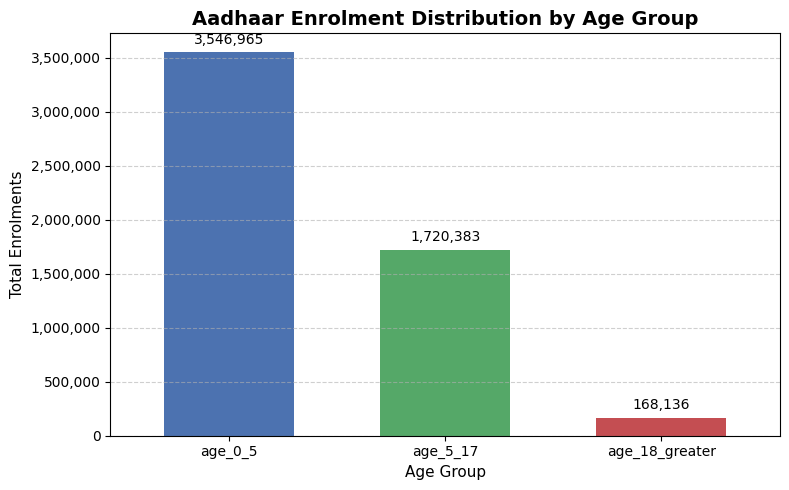

In [29]:
# Bar Chart: Enrolment Distribution by Age Group

plt.figure(figsize=(8, 5))

ax = enroll_age_sum.plot(
    kind='bar',
    color=['#4C72B0', '#55A868', '#C44E52'],
    width=0.6
)

plt.title('Aadhaar Enrolment Distribution by Age Group',
          fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Total Enrolments', fontsize=11)

plt.xticks(rotation=0)

# Formating Y-axis numbers
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Adding value labels
ax.bar_label(
    ax.containers[0],
    fmt='{:,.0f}',
    padding=4,
    fontsize=10
)

# Cleaning grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Insight**

- The **0-5 age group** dominates enrolments

- Indicates Aadhaar adoption is **highest among child**

- **Adult enrolment is comparatively lower**, highlighting scope for targeted outreach

**Aadhaar Enrolment – Time Trend**

<Figure size 1200x600 with 0 Axes>

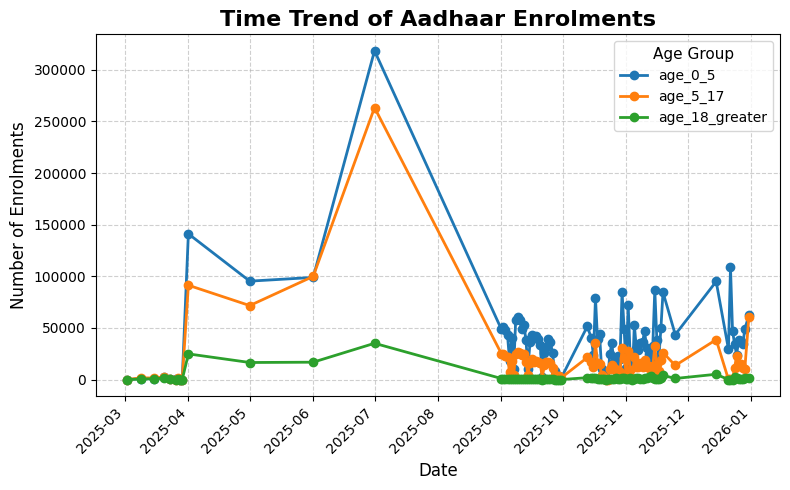

In [30]:
# Line Chart 
# Aggregating enrolments by date
enroll_time = enroll_df.groupby('date')[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(12, 6))

ax = enroll_time.plot(
    linewidth=2,
    marker='o'
)

plt.title('Time Trend of Aadhaar Enrolments', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Enrolments', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(
    title='Age Group',
    fontsize=10,
    title_fontsize=11
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

- Enrolments **show periodic spikes**

- **Child enrolment remains consistently higher** over time

- Indicates steady **Aadhaar onboarding activity**

**Aadhaar Demographic Updates – Age-wise Distribution**

In [31]:
# Data Preparation 
demo_age = demo_df[['demo_age_5_17', 'demo_age_17_']]
demo_age_sum = demo_age.sum()
demo_age_sum

demo_age_5_17     4859307
demo_age_17_     44389380
dtype: int64

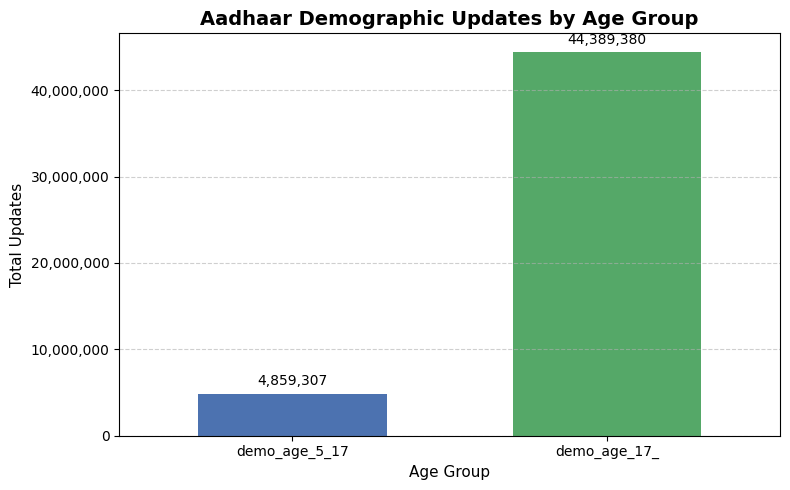

In [32]:
# Bar Chart: Demographic Update Distribution

plt.figure(figsize=(8, 5))

ax = demo_age_sum.plot(
    kind='bar',
    color=['#4C72B0', '#55A868', '#C44E52'],
    width=0.6
)

plt.title('Aadhaar Demographic Updates by Age Group',
          fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Total Updates', fontsize=11)

plt.xticks(rotation=0)

# Formating Y-axis with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Adding value labels on bars
ax.bar_label(
    ax.containers[0],
    fmt='{:,.0f}',
    padding=4,
    fontsize=10
)

# grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Insight**

- Higher updates in **17+ age group**

- Reflects frequent **changes in address, mobile number and personal details**

- Strongly linked to **migration and employment mobility**

**Aadhaar Demographic Updates – Time Trend**

In [33]:
# data preparation 
demo_time = demo_df.groupby('date')[['demo_age_5_17','demo_age_17_']].sum()

<Figure size 1200x600 with 0 Axes>

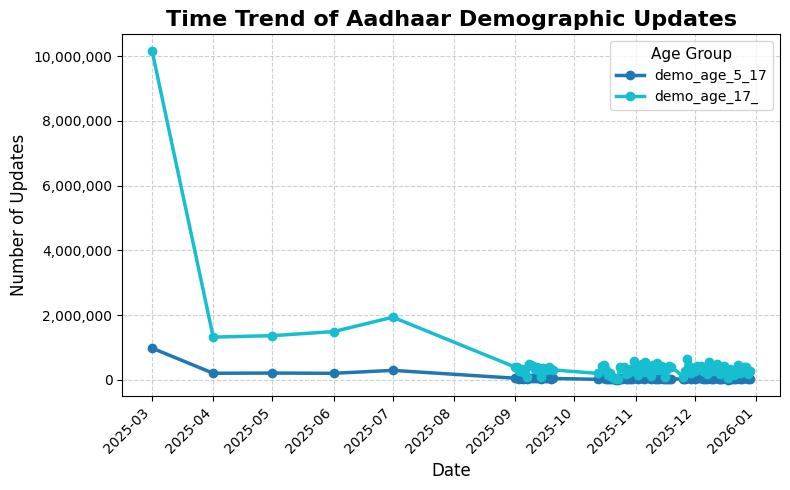

In [34]:
# line chart 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))

ax = demo_time.plot(
    linewidth=2.5,
    marker='o',
    colormap='tab10'
)

plt.title('Time Trend of Aadhaar Demographic Updates',fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Updates', fontsize=12)

# Formating Y-axis numbers
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# grid
plt.grid(True, linestyle='--', alpha=0.6)

# Legend formatting
plt.legend(
    title='Age Group',
    fontsize=10,
    title_fontsize=11
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

- Demographic updates **occur regularly over time**

- **Child updates** dominate consistently

- Shows **importance of continuous Aadhaar data maintenance**

**Aadhaar Biometric Updates – Age-wise Distribution**

In [35]:
bio_df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'total_bio', 'child_bio_ratio'],
      dtype='object')

In [36]:
# data preparation 
bio_age = bio_df[['bio_age_5_17', 'bio_age_17_']]
bio_age_sum = bio_age.sum()
bio_age_sum

bio_age_5_17    34226855
bio_age_17_     35536240
dtype: int64

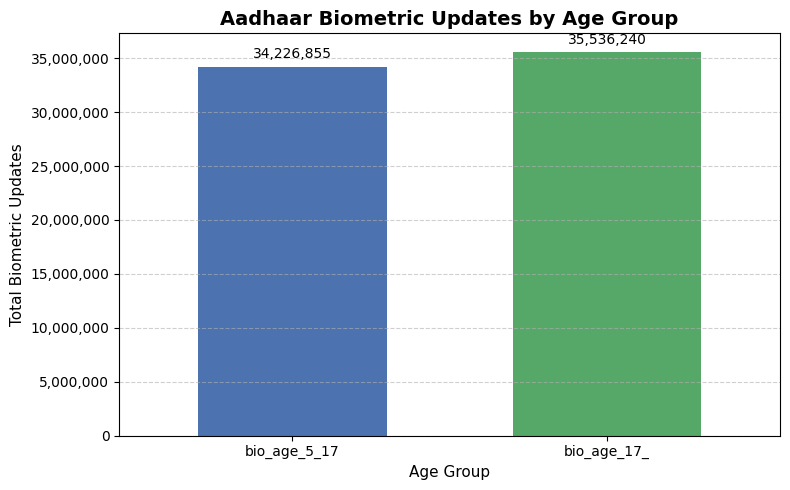

In [37]:
# Bar Chart: Biometric Update Distribution

plt.figure(figsize=(8, 5))

ax = bio_age_sum.plot(
    kind='bar',
    color=['#4C72B0', '#55A868', '#C44E52'],
    width=0.6
)

plt.title('Aadhaar Biometric Updates by Age Group',fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Total Biometric Updates', fontsize=11)

plt.xticks(rotation=0)

# Formating Y-axis with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Adding value labels on bars
ax.bar_label(
    ax.containers[0],
    fmt='{:,.0f}',
    padding=4,
    fontsize=10
)

# grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Insight**

- Sharp **increase** in biometric updates **after age 17**

- Strongly linked to **biometric revalidation during adulthood**

- Indicates **compliance with UIDAI biometric update guidelines**

**Aadhaar Biometric Updates – Time Trend**

In [38]:
# data preparation 
bio_time = bio_df.groupby('date')[['bio_age_5_17','bio_age_17_']].sum()

<Figure size 1200x600 with 0 Axes>

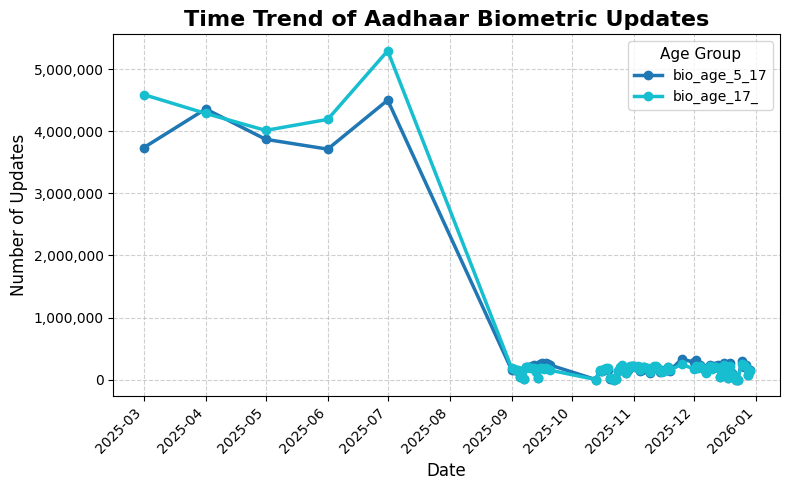

In [39]:
# line chart 
plt.figure(figsize=(12, 6))

ax = bio_time.plot(
    linewidth=2.5,
    marker='o',
    colormap='tab10'
)

plt.title('Time Trend of Aadhaar Biometric Updates',fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Updates', fontsize=12)

# formating Y-axis values with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# grid
plt.grid(True, linestyle='--', alpha=0.6)

# legend styling
plt.legend(
    title='Age Group',
    fontsize=10,
    title_fontsize=11
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

- Biometric updates **show distinct temporal spikes**

- Peaks likely correspond to **policy drives or awareness campaigns**

- **Adult updates** significantly outnumber child updates

#### **5.2 📈 BIVARIATE ANALYSIS**

**Objective**

To study relationships between two variables, focusing on:

- Age group vs enrolment volume

- State-wise enrolment vs updates

- Time vs update frequency

**Age Group vs Enrolment Volume**

In [40]:
# data preparation
age_enroll = enroll_df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

age_enroll_df = age_enroll.reset_index()
age_enroll_df.columns = ['Age_Group', 'Total_Enrolments']
age_enroll_df

,Age_Group,Total_Enrolments
0,age_0_5,3546965
1,age_5_17,1720383
2,age_18_greater,168136


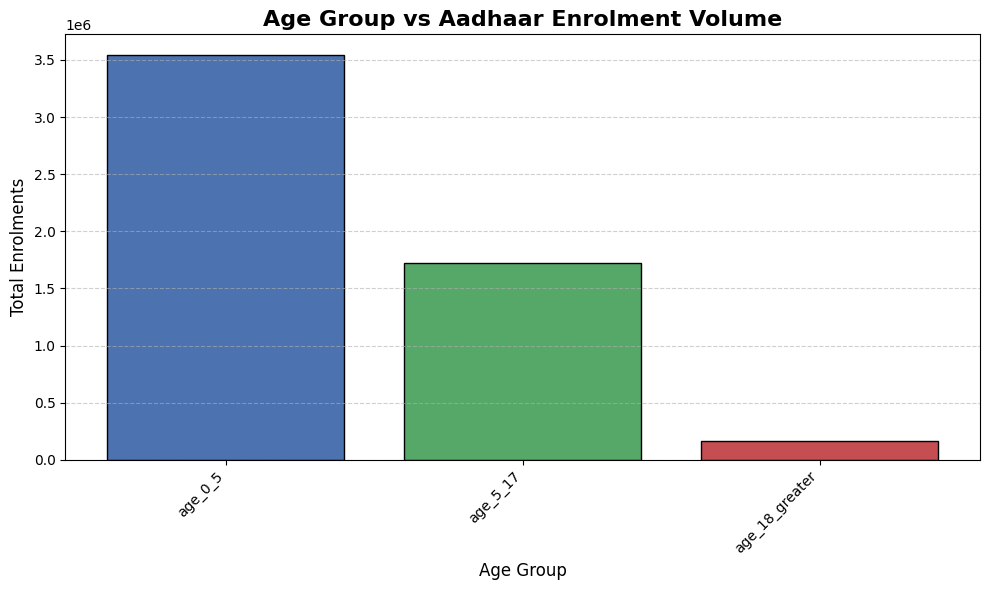

In [41]:
# grouped bar chart 

plt.figure(figsize=(10, 6))

plt.bar(
    age_enroll_df['Age_Group'],
    age_enroll_df['Total_Enrolments'],
    color=['#4C72B0', '#55A868', '#C44E52'],
    edgecolor='black'
)

plt.title('Age Group vs Aadhaar Enrolment Volume', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Enrolments', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Insight**

- Aadhaar enrolment is heavily skewed towards child (0 to 5)

**State-wise Enrolment vs Demographic Updates**

In [42]:
# data preparation 
state_enroll = enroll_df.groupby('state')['total_enrollment'].sum()
state_demo = demo_df.groupby('state')['total_demo'].sum()

state_compare = pd.concat([state_enroll, state_demo], axis=1)
state_compare.columns = ['Total_Enrolment', 'Total_Demographic_Updates']
state_compare = state_compare.dropna()
state_compare

,Total_Enrolment,Total_Demographic_Updates
state,,
Andaman And Nicobar Islands,511,6187.0
Andhra Pradesh,127686,2295582.0
Arunachal Pradesh,4344,36443.0
Assam,230197,1012578.0
Bihar,609585,4814350.0
Chandigarh,2723,83361.0
Chhattisgarh,103219,2005434.0
Dadra And Nagar Haveli And Daman And Diu,889,3740.0
Delhi,94529,1438934.0


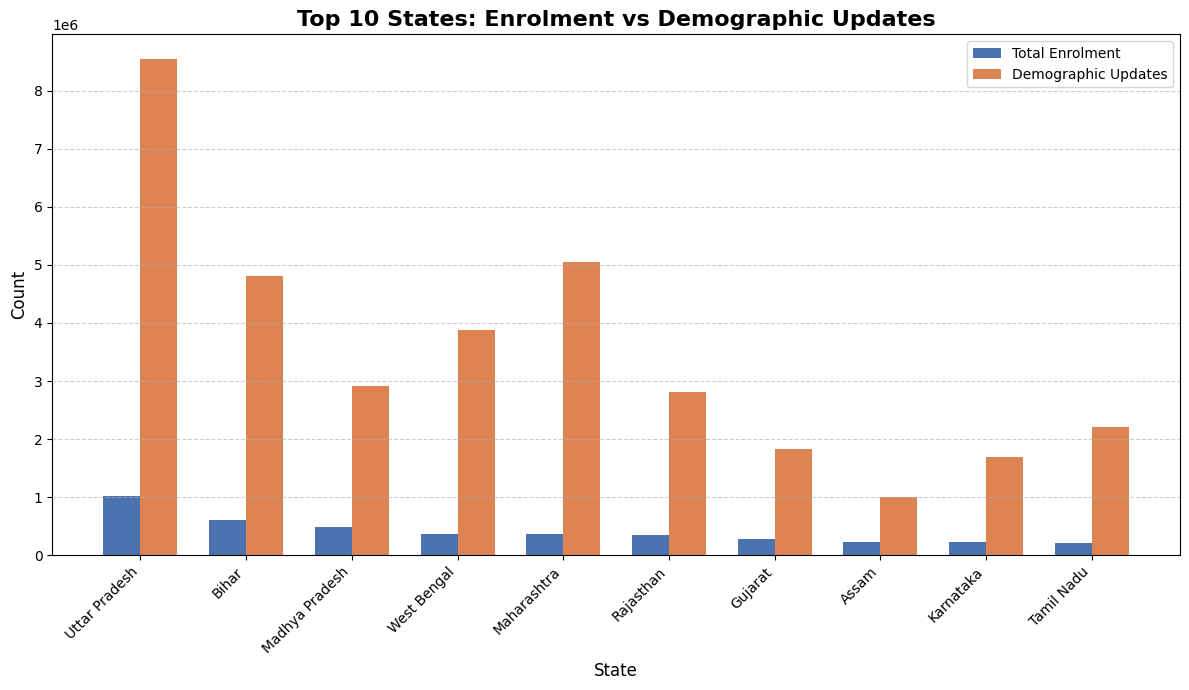

In [43]:
# Select top 10 states
top10 = state_compare.sort_values(
    'Total_Enrolment', ascending=False
).head(10)

# Bar positions
x = np.arange(len(top10))
width = 0.35

plt.figure(figsize=(12, 7))

# Bars
plt.bar(
    x - width/2,
    top10['Total_Enrolment'],
    width,
    label='Total Enrolment',
    color='#4C72B0'
)

plt.bar(
    x + width/2,
    top10['Total_Demographic_Updates'],
    width,
    label='Demographic Updates',
    color='#DD8452'
)

# Titles & labels
plt.title(
    'Top 10 States: Enrolment vs Demographic Updates',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Ticks
plt.xticks(x, top10.index, rotation=45, ha='right')

# Grid & legend
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Insight**

- States with high enrolment also **show high update activity**

- Indicates **mature Aadhaar ecosystems with active data maintenance**

- Useful **for resource planning and update center allocation**

**Time vs Update Frequency**

In [44]:
# data preparation
time_updates = demo_df.groupby('date')['total_demo'].sum()
time_updates.head()

date
2025-03-01    11146712
2025-04-01     1514550
2025-05-01     1566287
2025-06-01     1685562
2025-07-01     2220715
Name: total_demo, dtype: int64

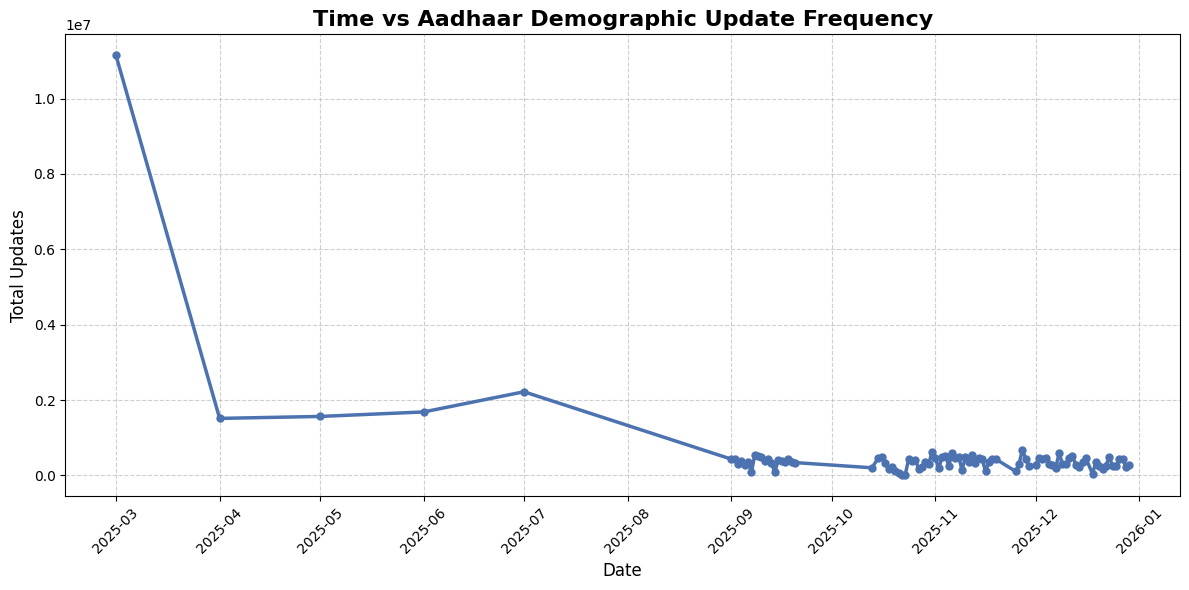

In [45]:
# trend line 
plt.figure(figsize=(12, 6))

plt.plot(
    time_updates.index,
    time_updates.values,
    color='#4C72B0',
    linewidth=2.5,
    marker='o',
    markersize=5
)

plt.title(
    'Time vs Aadhaar Demographic Update Frequency',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Updates', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

- Update frequency **shows periodic spikes**

- Likely driven by **policy campaigns, migration cycles or awareness programs**

#### **5.3 📊 MULTIVARIATE ANALYSIS**

**Objective**

To uncover complex patterns across multiple dimensions:

- Age × State × Time

- Enrolment vs Demographic vs Biometric Updates

- Regional update intensity

**Age Group × State × Time (Heatmap)**

In [46]:
# data preparation 
heatmap_data = enroll_df.groupby(['state'])[['age_0_5','age_5_17','age_18_greater']].sum()
heatmap_data = heatmap_data.head(10)  # top 10 states
heatmap_data

,age_0_5,age_5_17,age_18_greater
state,,,
Andaman And Nicobar Islands,479,32,0
Andhra Pradesh,112445,13746,1495
Arunachal Pradesh,1957,2236,151
Assam,141235,66085,22877
Bihar,262875,334802,11908
Chandigarh,2476,211,36
Chhattisgarh,82453,18769,1997
Dadra And Nagar Haveli,691,74,4
Dadra And Nagar Haveli And Daman And Diu,679,162,48


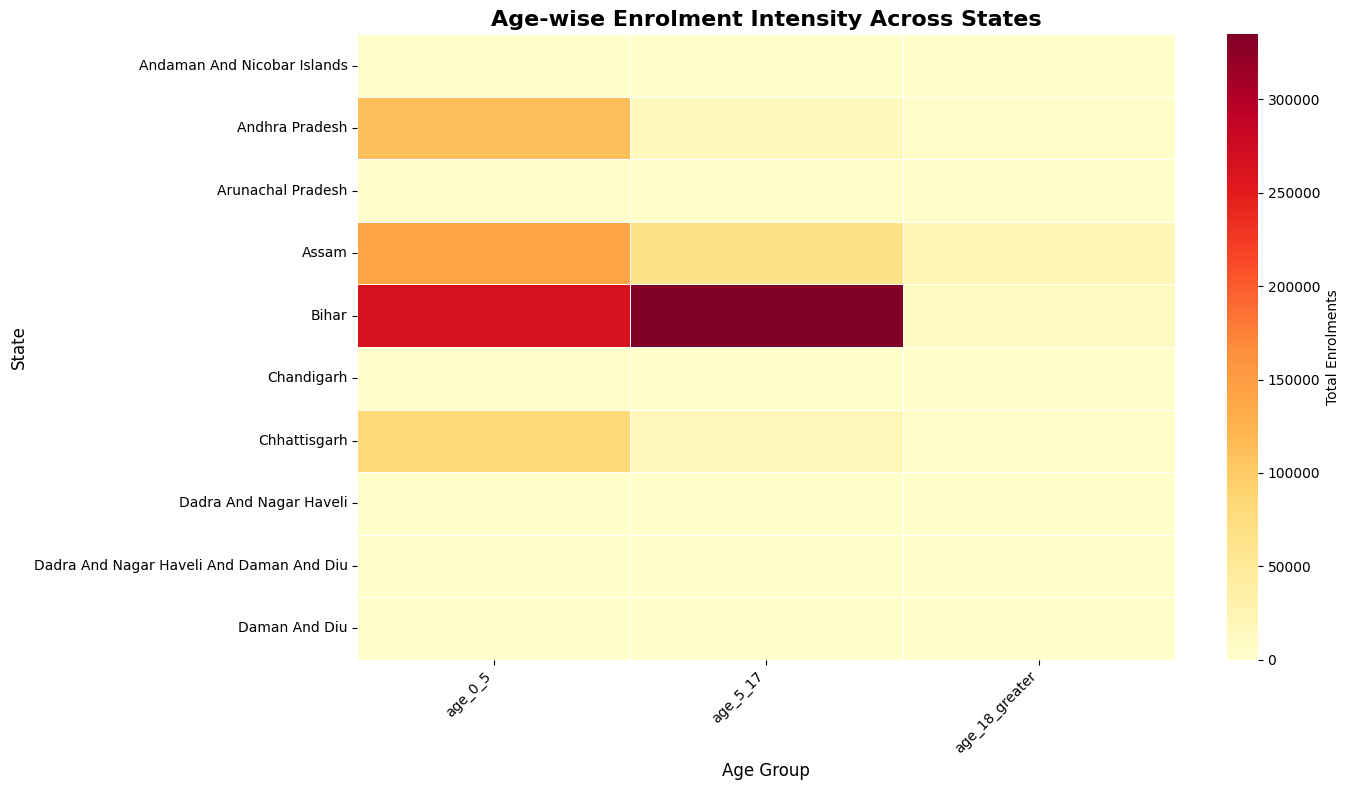

In [47]:
# heatmap
plt.figure(figsize=(14, 8))

sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Total Enrolments'},
    annot=False
)

plt.title(
    'Age-wise Enrolment Intensity Across States',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**Insight**

- **Bihar stands out with very high enrolment intensity in both child (0–5) and adolescent (5–17) categories**, indicating strong coverage initiatives.

- **Assam and Andhra Pradesh** show moderate-to-high enrolment among younger age groups, **reflecting regional inclusion efforts.**

- **UTs and smaller regions display consistently low enrolment** intensity across all age groups due to smaller populations.

- The heatmap clearly **reveals regional disparities**, useful for targeting child-focused enrolment campaigns.

**Enrolment vs Demographic vs Biometric Updates (Stacked Bar Chart)**

In [48]:
# data preparation 
combined_updates = pd.DataFrame({
    'Enrolment': enroll_df['total_enrollment'].sum(),
    'Demographic Updates': demo_df['total_demo'].sum(),
    'Biometric Updates': bio_df['total_bio'].sum()
}, index=['Total'])

combined_updates

,Enrolment,Demographic Updates,Biometric Updates
Total,5435484,49248687,69763095


<Figure size 1000x600 with 0 Axes>

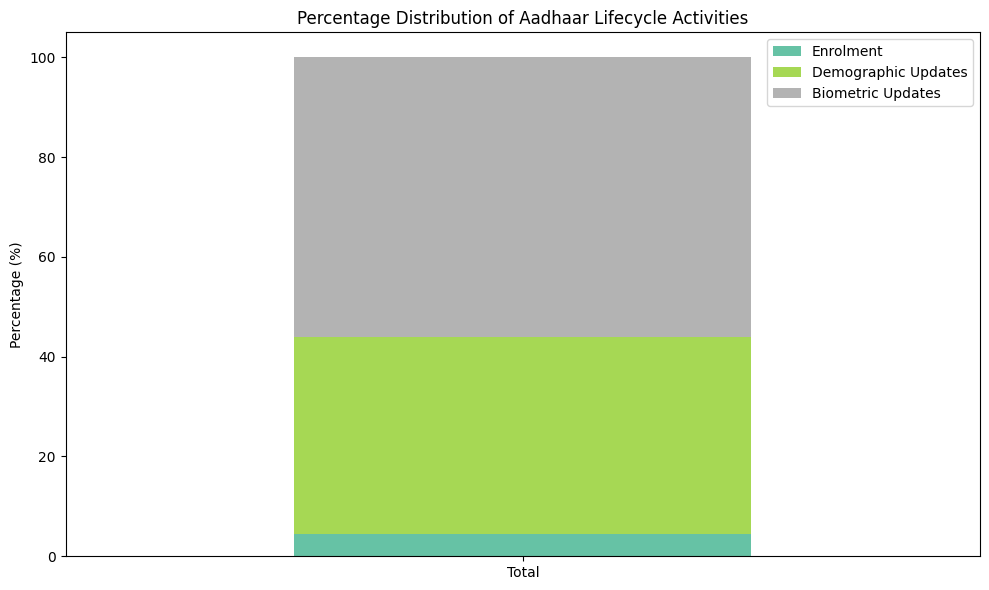

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

combined_pct = combined_updates.div(
    combined_updates.sum(axis=1), axis=0
) * 100

combined_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'
)

plt.title('Percentage Distribution of Aadhaar Lifecycle Activities')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Insights**

- **Biometric updates form the largest share of Aadhaar lifecycle activities**, accounting for more than half of total transactions.

- **Demographic updates constitute a substantial portion**, emphasizing frequent changes in address, mobile number and personal details.

- **New enrolments form a relatively small percentage**, confirming that Aadhaar has largely reached saturation nationwide.

- **Policy focus should therefore shift from enrolment drives to efficient update and revalidation mechanisms.**

- **Highlights the need for continuous funding and staffing for update centers.**

**Regional Comparison of Update Intensity (Multi-line Chart)**

In [50]:
# data preparation 
state_bio = bio_df.groupby('state')['total_bio'].sum()
state_demo = demo_df.groupby('state')['total_demo'].sum()

regional_updates = pd.concat([state_bio, state_demo], axis=1)
regional_updates.columns = ['Biometric_Updates', 'Demographic_Updates']
regional_updates = regional_updates.head(10) # top 10
regional_updates

,Biometric_Updates,Demographic_Updates
state,,
Andaman And Nicobar Islands,20698,6187.0
Andhra Pradesh,3714633,2295582.0
Arunachal Pradesh,72394,36443.0
Assam,982722,1012578.0
Bihar,4897587,4814350.0
Chandigarh,74482,83361.0
Chhattisgarh,2648734,2005434.0
Dadra And Nagar Haveli,27788,NaN
Dadra And Nagar Haveli And Daman And Diu,2532,3740.0


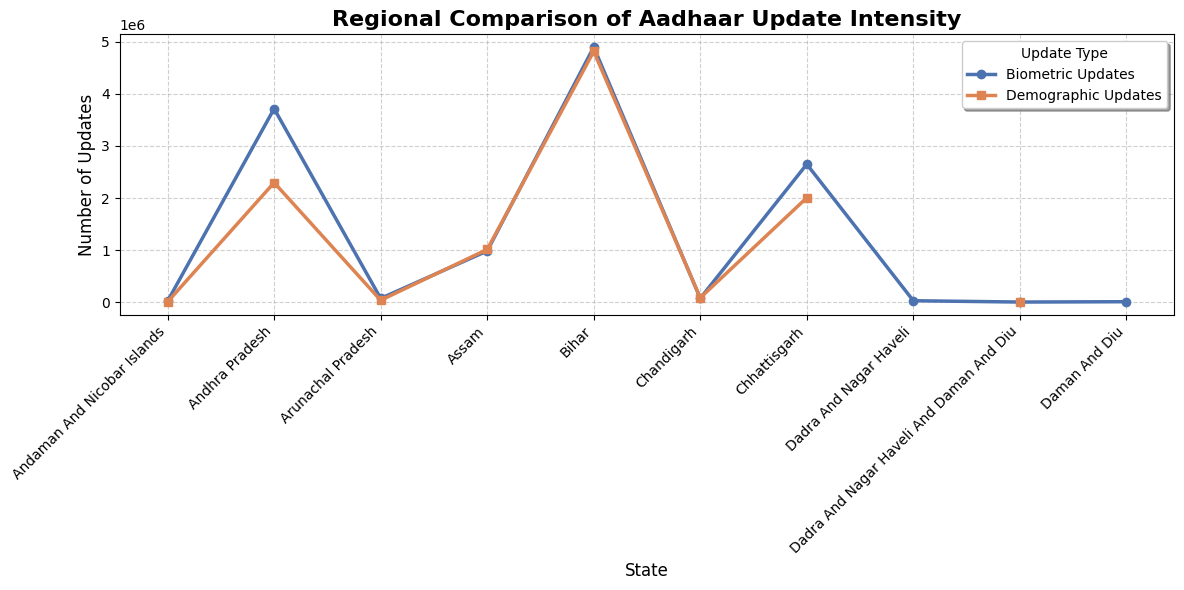

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(
    regional_updates.index,
    regional_updates['Biometric_Updates'],
    label='Biometric Updates',
    color='#4C72B0',
    linewidth=2.5,
    marker='o'
)

plt.plot(
    regional_updates.index,
    regional_updates['Demographic_Updates'],
    label='Demographic Updates',
    color='#DD8452',
    linewidth=2.5,
    marker='s'
)

plt.title(
    'Regional Comparison of Aadhaar Update Intensity',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Updates', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(
    title='Update Type',
    frameon=True,
    shadow=True
)

plt.tight_layout()
plt.show()

**Insights**

- Biometric updates consistently exceed demographic updates across most states,**highlighting the importance of biometric revalidation in the Aadhaar lifecycle.**

- **Bihar shows the highest update intensity for both biometric and demographic updates**, indicating large-scale Aadhaar maintenance activity driven by population size and age transitions.

- **Andhra Pradesh and Chhattisgarh also exhibit significantly high update volumes**, reflecting mature Aadhaar ecosystems.

- **Smaller UTs and island territories (e.g., Andaman & Nicobar, Daman & Diu)** show negligible updates due to lower population bases.

- This pattern indicates **higher administrative workload and infrastructure demand in populous states.**

#### **6. 🌍 Impact of the Analysis**

This analysis of Aadhaar enrolment, demographic updates, and biometric updates provides actionable insights with significant administrative, social, and policy-level impact for UIDAI and allied government stakeholders.

**6.1 Administrative & Governance Impact**

- The identification of high-update intensity states (such as Bihar, Andhra Pradesh, and Chhattisgarh) enables UIDAI to prioritize resource allocation, including staffing, infrastructure, and biometric devices.

- The dominance of biometric updates over new enrolments highlights the need to shift focus from enrolment drives to efficient lifecycle management of Aadhaar.

- Time-based update trends allow authorities to anticipate peak workloads, improving scheduling and reducing congestion at Aadhaar Seva Kendras.

- State-wise and age-wise insights support data-driven decision-making instead of uniform, one-size-fits-all policy implementation.

**6.2 Policy & Strategic Impact**

- The high proportion of biometric updates among the 17+ age group validates the importance of mandatory biometric revalidation policies during age transitions.

- Inter-state variation in child enrolment intensity reveals inclusion gaps, guiding targeted policies for early Aadhaar registration.

- The analysis reinforces Aadhaar’s role as a dynamic identity system, necessitating long-term planning beyond initial enrolment saturation.

- Findings can inform future UIDAI guidelines on update frequency, mobile update units, and digital self-service mechanisms.

**6.3 Social Impact**

- Improved update infrastructure in high-demand regions directly enhances citizen access to welfare schemes, banking services, and digital governance platforms.

- Targeted enrolment strategies for children ensure early inclusion, reducing identity exclusion in education and healthcare access.

- Efficient demographic update systems help migrant populations maintain accurate identity records, improving service continuity.

- Strengthening Aadhaar lifecycle management improves trust and reliability in India’s digital identity ecosystem.

**6.4 Operational & Infrastructure Impact**

- The regional comparison of update intensity enables predictive planning for Aadhaar centers, reducing downtime and citizen wait times.

- Insights into update composition (demographic vs biometric) support technology optimization, such as biometric device upgrades in high-usage areas.

- Enables UIDAI to design state-specific operational models rather than uniform deployment.

- Supports scalability planning for future population growth and policy changes.

**5.5 Practical Applicability & Feasibility**

- The analysis uses existing UIDAI datasets, ensuring immediate implementability without additional data collection costs.

- The methodology is replicable and scalable, allowing UIDAI to apply it periodically for monitoring and evaluation.

- Results can be integrated into real-time dashboards for continuous governance insights.

- Provides a foundation for predictive analytics and anomaly detection in Aadhaar operations.

**7. 🔚 Conclusion**

This analysis demonstrates how Aadhaar enrolment and update datasets can be leveraged to generate actionable insights for governance, planning and citizen service improvement.The findings **highlight the importance of age transitions, regional disparities and continuous data maintenance in India’s digital identity ecosystem.**